In [3]:
% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

In [5]:
df = pd.read_csv("all.csv")

/Users/shioda/.pyenv/versions/3.5.1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,22,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


北海道     2
四国      3
東北      4
東海      5
中国      6
信州      7
関西     12
関東     20
dtype: int64


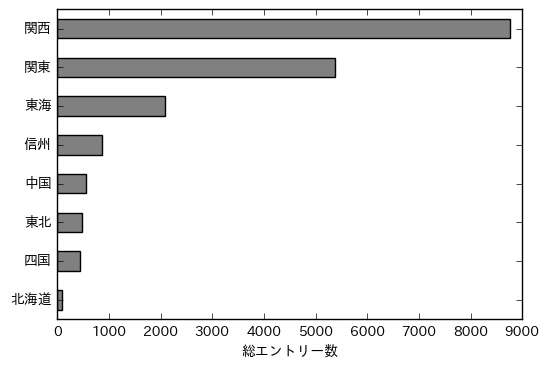

In [31]:
df16 = df[df['date'] > "2016.04.01"]
titles = df16.title.unique()
areas = {
   "関東":[
      "茨城",
      "弱虫",
      "宇都宮",
      "湘南",
      "全日本",
      "千葉",
      "前橋",
      "東京"
   ],
   "関西":[
      "関西",
      "マキノ",
      "くろんど"
   ],
   "信州":[
      "ミーティング",
       "NOBEYAMA",
       "信州"
   ],
   "東北":[
      "TOHOKU"
   ],
   "北海道":[
      "北海道"
   ],
   "東海":[
      "東海"
   ],
   "中国":[
      "中国"
   ],
   "四国":[
      "さぬき",
      "阿波",
      "高知"
   ]
}
n_races = {}
participants = {}
columns = []
for title in titles:
    target_area = None
    for area, values in areas.items():
        for value in values:
            if value in title:
                target_area = area
                break
    if target_area is None:
        continue
    df_target = df16[df16["title"].str.contains(title)]
    n_participants = participants.get(target_area, 0) + len(df_target)
    participants[target_area] = n_participants
    n_races[target_area] = n_races.get(target_area, 0) + 1

df_participants = pd.Series(participants).sort_values()
plt.xlabel("総エントリー数")
df_participants.plot(kind="barh", color=(0.5, 0.5, 0.5))
plt.savefig("2016_area_entry.png", format='png', dpi=1000)

df_n_races = pd.Series(n_races).sort_values()
print(df_n_races)

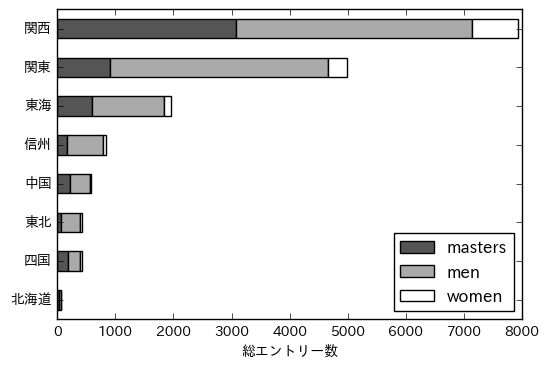

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
df16 = df[df['date'] > "2016.04.01"]
titles = df16.title.unique()
n_races = {}
participants = {}
columns = []
categories = {
    "C1": "men",
    "C2": "men",
    "C3": "men",
    "C4": "men",
    "CL1": "women",
    "CL2": "women",
    "CL3": "women",
    "CM1": "masters",
    "CM2": "masters",
    "CM3": "masters",
    "CM2\+3": "masters"
}
areas = {
   "関東":[
      "茨城",
      "弱虫",
      "宇都宮",
      "湘南",
      "全日本",
      "千葉",
      "前橋",
      "東京"
   ],
   "関西":[
      "関西",
      "マキノ",
      "くろんど"
   ],
   "信州":[
      "ミーティング",
       "NOBEYAMA",
       "信州"
   ],
   "東北":[
      "TOHOKU"
   ],
   "北海道":[
      "北海道"
   ],
   "東海":[
      "東海"
   ],
   "中国":[
      "中国"
   ],
   "四国":[
      "さぬき",
      "阿波",
      "高知"
   ]
}
for title in titles:
    target_area = None
    for area, values in areas.items():
        for value in values:
            if value in title:
                target_area = area
                break
        
    if target_area is None:
        continue
    
    df_target = df16[df16["title"].str.contains(title)]
    participants[target_area] = participants.get(target_area, {})
    sum_participants = 0
    for category, genre in categories.items():
        df_genre = df_target[df_target['category'].str.contains(category)]
        n_participants = participants[target_area].get(genre, 0) + len(df_genre)
        participants[target_area][genre] = n_participants
        sum_participants += n_participants
    participants[target_area]["sum"] = sum_participants

# print(participants)
# print(pd.DataFrame(participants))
# df_participants.plot(kind="barh")
# plt.xlabel("総エントリー数")
# plt.savefig("2016_area_genre_entry.png", format='png', dpi=1000)

df_participants = pd.DataFrame(participants).T
df_participants = df_participants.sort_values("sum", ascending=True)
df_participants = df_participants.drop("sum", axis=1)

color =  [((x+1)/3, (x+1)/3, (x+1)/3) for x in range(3)]
df_participants.plot(kind="barh", stacked=True, color=color )
plt.legend(loc="lower right")
plt.xlabel("総エントリー数")
plt.savefig("2016_area_genre_entry_stacked.png", dpi=1000)

# df_participants.T.plot(kind="barh", stacked=True)
# plt.legend()
# plt.xlabel("総エントリー数")
# plt.savefig("2016_area_genre_entry_stacked_transpose.png", dpi=1000)

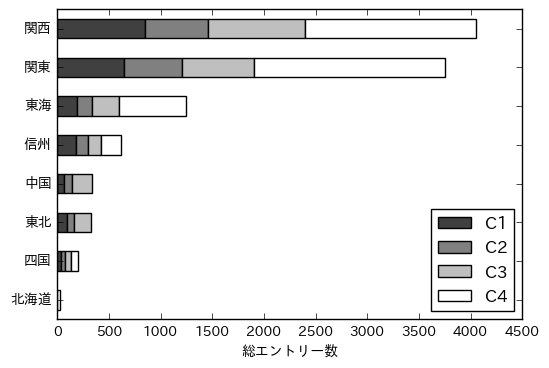

In [60]:

n_races = {}
participants = {}
columns = []
categories = ["C1", "C2", "C3", "C4"]
df16 = df[df['date'] > "2016.04.01"]
titles = df16.title.unique()
areas = {
   "関東":[
      "茨城",
      "弱虫",
      "宇都宮",
      "湘南",
      "全日本",
      "千葉",
      "前橋",
      "東京"
   ],
   "関西":[
      "関西",
      "マキノ",
      "くろんど"
   ],
   "信州":[
      "ミーティング",
       "NOBEYAMA",
       "信州"
   ],
   "東北":[
      "TOHOKU"
   ],
   "北海道":[
      "北海道"
   ],
   "東海":[
      "東海"
   ],
   "中国":[
      "中国"
   ],
   "四国":[
      "さぬき",
      "阿波",
      "高知"
   ]
}
for title in titles:
    target_area = None
    for area, values in areas.items():
        for value in values:
            if value in title:
                target_area = area
                break
        
    if target_area is None:
        continue
    
    df_target = df16[df16["title"].str.contains(title)]
    participants[target_area] = participants.get(target_area, {})
    sum_participants = 0
    for category in categories:
        df_category = df_target[df_target['category'].str.contains(category)]
        n_participants = participants[target_area].get(category, 0) + len(df_category)
        participants[target_area][category] = n_participants
        sum_participants += n_participants
    participants[target_area]["sum"] = sum_participants

df_participants = pd.DataFrame(participants).T
df_participants = df_participants.sort_values("sum", ascending=True)
df_participants = df_participants.drop("sum", axis=1)

color =  [((x+1)/4, (x+1)/4, (x+1)/4) for x in range(4)]
df_participants.plot(kind="barh", stacked=True, color=color )
plt.legend(loc="lower right")
plt.xlabel("総エントリー数")
plt.savefig("2016_area_men_category_entry_stacked.png", dpi=1000)

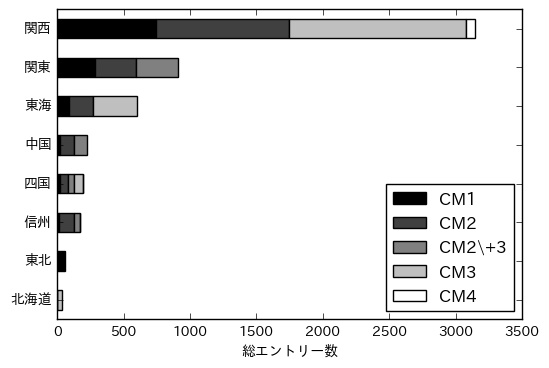

In [59]:

n_races = {}
participants = {}
columns = []
categories = ["CM1", "CM2", "CM3", "CM4", "CM2\+3"]
df16 = df[df['date'] > "2016.04.01"]
titles = df16.title.unique()
areas = {
   "関東":[
      "茨城",
      "弱虫",
      "宇都宮",
      "湘南",
      "全日本",
      "千葉",
      "前橋",
      "東京"
   ],
   "関西":[
      "関西",
      "マキノ",
      "くろんど"
   ],
   "信州":[
      "ミーティング",
       "NOBEYAMA",
       "信州"
   ],
   "東北":[
      "TOHOKU"
   ],
   "北海道":[
      "北海道"
   ],
   "東海":[
      "東海"
   ],
   "中国":[
      "中国"
   ],
   "四国":[
      "さぬき",
      "阿波",
      "高知"
   ]
}
for title in titles:
    target_area = None
    for area, values in areas.items():
        for value in values:
            if value in title:
                target_area = area
                break
        
    if target_area is None:
        continue
    
    df_target = df16[df16["title"].str.contains(title)]
    participants[target_area] = participants.get(target_area, {})
    sum_participants = 0
    for category in categories:
        df_category = df_target[df_target['category'].str.contains(category)]
        n_participants = participants[target_area].get(category, 0) + len(df_category)
        participants[target_area][category] = n_participants
        sum_participants += n_participants
    participants[target_area]["sum"] = sum_participants

df_participants = pd.DataFrame(participants).T
df_participants = df_participants.sort_values("sum", ascending=True)
df_participants = df_participants.drop("sum", axis=1)

color =  [((x)/4, (x)/4, (x)/4) for x in range(5)]
df_participants.plot(kind="barh", stacked=True, color=color )
plt.legend(loc="lower right")
plt.xlabel("総エントリー数")
plt.savefig("2016_area_masters_category_entry_stacked.png", dpi=1000)

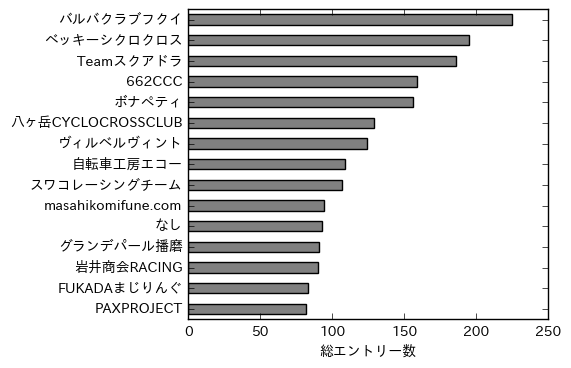

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)   
fig.subplots_adjust(left=0.3) 
df16["チーム"].value_counts()[:15].sort_values().plot(kind="barh", color=(0.5, 0.5, 0.5))
plt.xlabel("総エントリー数")
plt.savefig("2016_team_entry.png", format='png', dpi=500)

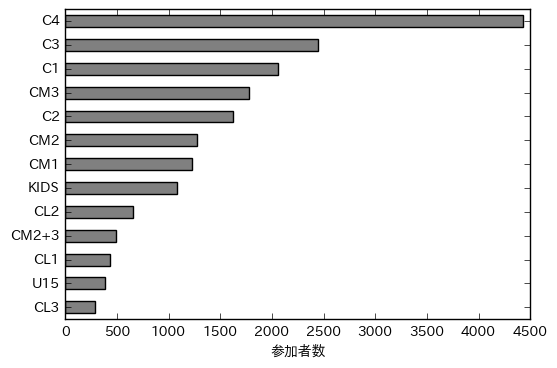

In [26]:
df16["category"].value_counts()[:13].sort_values().plot(kind="barh", color=(0.5, 0.5, 0.5))
plt.xlabel("参加者数")
plt.savefig("2016_category_entry.png", format='png', dpi=500)

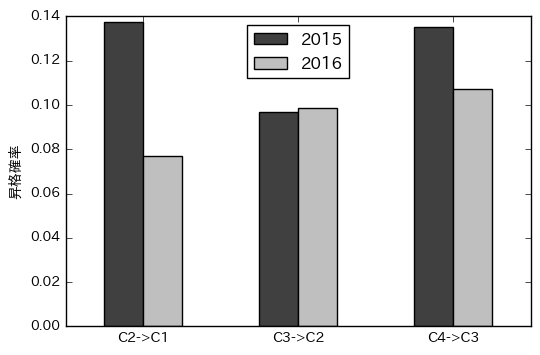

In [29]:
columns = ["C2->C1", "C3->C2", "C4->C3"]
index = [2015, 2016]
improve_data = [
    [0.137546468401487, 0.09702970297029703, 0.1353300055463117],
    [0.07692307692307693, 0.09885535900104059, 0.10708898944193061]
]
df_improve = pd.DataFrame(improve_data, columns=columns, index=index).T
df_improve.plot(kind="bar", color=[(0.25, 0.25, 0.25), (0.75, 0.75, 0.75)])
plt.xticks(rotation=0)
plt.ylabel("昇格確率")
plt.savefig("2015_2016_improve.png", format='png', dpi=1000)

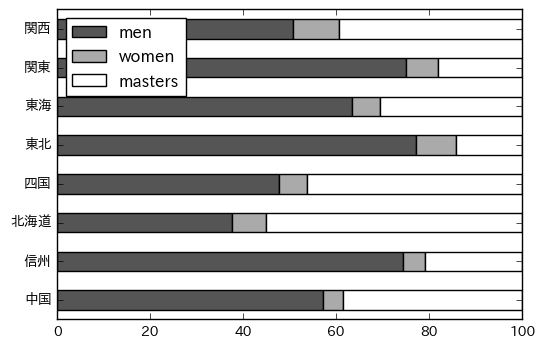

In [49]:
areas = ["中国","信州","北海道","四国","東北","東海","関東","関西"]
men = [57.24020443,74.42977191,37.68115942,47.63033175,77.12264151,63.37741607,75.10514721,50.71339174]
women = [4.258943782,4.681872749,7.246376812,6.161137441,8.726415094,6.103763988,6.72942119,9.912390488]
masters = [38.50085179,20.88835534,55.07246377,46.20853081,14.1509434,30.51881994,18.1654316,39.37421777]

import pandas as pd
color =  [((x+1)/3, (x+1)/3, (x+1)/3) for x in range(3)]

df_gender = pd.DataFrame([men, women, masters], columns=areas, index=["men", "women", "masters"])
df_gender.T.plot(kind="barh", stacked=True, color=color)
plt.legend(loc="upper left")
plt.xlim(0, 100)
plt.savefig("2016_area_gender_rate.png", dpi=1000)

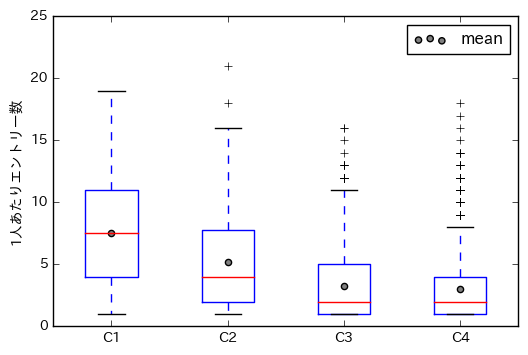

In [55]:
import numpy as np
from scipy import stats
import pylab
categories = []
entries = []
means = []
for i in range(4):
    category = "C{0}".format(i+1)
    df_cat = df16[df16["category"].str.contains(category)]
    entry = np.array(df_cat["名前"].value_counts().values)
    categories.append(category)
    entries.append(entry)
    means.append(np.mean(entry))
pylab.boxplot(entries)

pylab.scatter([1,2,3,4], means, s=20, label="mean", c="gray")
plt.legend()
plt.xticks([1,2,3,4], categories)
plt.ylabel("1人あたりエントリー数")
plt.savefig("2016_rider_each_category_entry_statistics.png", format='png', dpi=500)
